# Noise2Void - 2D Example for BSD68 Data

The data used in this notebook is the same as presented in the paper.

In [1]:
# We import all our dependencies.
from n2v.models import N2VConfig, N2V
import numpy as np
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
import urllib
import os
import zipfile

Using TensorFlow backend.


# Training Data Preparation

In [2]:
# create a folder for our data
if not os.path.isdir('./data'):
    os.mkdir('data')

# check if data has been downloaded already
zipPath="data/BSD68_reproducibility.zip"
if not os.path.exists(zipPath):
    #download and unzip data
    data = urllib.request.urlretrieve('https://cloud.mpi-cbg.de/index.php/s/pbj89sV6n6SyM29/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("data")

In [3]:
X = np.load('data/BSD68_reproducibility_data/train/DCNN400_train_gaussian25.npy')
X_val = np.load('data/BSD68_reproducibility_data/val/DCNN400_validation_gaussian25.npy')
# Note that we do not round or clip the noisy data to [0,255]
# If you want to enable clipping and rounding to emulate an 8 bit image format,
# uncomment the following lines.
# X = np.round(np.clip(X, 0, 255.))
# X_val = np.round(np.clip(X_val, 0, 255.))

# Adding channel dimension
X = X[..., np.newaxis]
print(X.shape)
X_val = X_val[..., np.newaxis]
print(X_val.shape)

(3168, 180, 180, 1)
(4, 180, 180, 1)


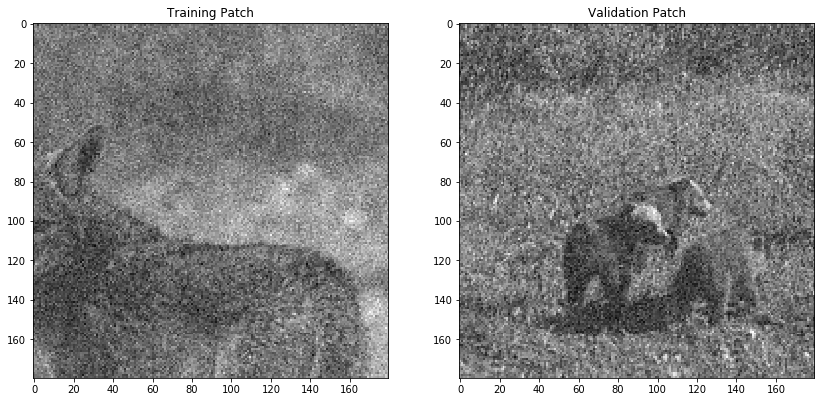

In [4]:
# Let's look at one of our training and validation patches.
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(X[0,...,0], cmap='gray')
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[0,...,0], cmap='gray')
plt.title('Validation Patch');

# Configure

In [5]:
config = N2VConfig(X, unet_kern_size=3, 
                   train_steps_per_epoch=400, train_epochs=200, train_loss='mse', batch_norm=True, 
                   train_batch_size=128, n2v_perc_pix=0.198, n2v_patch_shape=(64, 64), 
                   unet_n_first = 96,
                   unet_residual = True,
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=2)

# Let's look at the parameters stored in the config-object.
vars(config)

{'means': ['110.72957232412905'],
 'stds': ['63.656060106500874'],
 'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'unet_residual': True,
 'unet_n_depth': 2,
 'unet_kern_size': 3,
 'unet_n_first': 96,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 1),
 'train_loss': 'mse',
 'train_epochs': 200,
 'train_steps_per_epoch': 400,
 'train_learning_rate': 0.0004,
 'train_batch_size': 128,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'batch_norm': True,
 'n2v_perc_pix': 0.198,
 'n2v_patch_shape': (64, 64),
 'n2v_manipulator': 'uniform_withCP',
 'n2v_neighborhood_radius': 2,
 'probabilistic': False}

In [6]:
# a name used to identify the model
model_name = 'BSD68_reproducability_5x5'
# the base directory in which our model will live
basedir = 'models'
# We are now creating our network model.
model = N2V(config, model_name, basedir=basedir)
model.prepare_for_training(metrics=())

# Training

Training the model will likely take some time. We recommend to monitor the progress with TensorBoard, which allows you to inspect the losses during training. Furthermore, you can look at the predictions for some of the validation images, which can be helpful to recognize problems early on.

You can start TensorBoard in a terminal from the current working directory with tensorboard --logdir=. Then connect to http://localhost:6006/ with your browser.

In [7]:
# We are ready to start training now.
history = model.train(X, X_val)

/home/tbuchhol/Gitrepos/n2v/n2v/models/n2v_standard.py:173: UserWarning: small number of validation images (only 0.1% of all images)
  warnings.warn("small number of validation images (only %.1f%% of all images)" % (100*frac_val))
Preparing validation data: 100%|██████████| 4/4 [00:00<00:00, 437.90it/s]

8 blind-spots will be generated per training patch of size (64, 64).


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Epoch 1/200
400/400 [==============================] - 143s 357ms/step - loss: 0.2396 - val_loss: 0.2007
Epoch 2/200
400/400 [==============================] - 135s 338ms/step - loss: 0.2077 - val_loss: 0.1971
Epoch 3/200
400/400 [==============================] - 135s 337ms/step - loss: 0.2057 - val_loss: 0.1978
Epoch 4/200
400/400 [==============================] - 135s 337ms/step - loss: 0.2037 - val_loss: 0.2070
Epoch 5/200
400/400 [==============================] - 135s 337ms/step - loss: 0.2022 - val_loss: 0.2158
Epoch 6/200
400/400 [==============================] - 135s 337ms/step - loss: 0.2007 - val_loss: 0.2035
Epo

400/400 [==============================] - 135s 337ms/step - loss: 0.1932 - val_loss: 0.1883
Epoch 67/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1931 - val_loss: 0.1939
Epoch 68/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1919 - val_loss: 0.1901
Epoch 69/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1923 - val_loss: 0.1894

Epoch 00069: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 70/200
400/400 [==============================] - 135s 337ms/step - loss: 0.1927 - val_loss: 0.1903
Epoch 71/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1934 - val_loss: 0.1932
Epoch 72/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1929 - val_loss: 0.1909
Epoch 73/200
400/400 [==============================] - 135s 339ms/step - loss: 0.1927 - val_loss: 0.1903
Epoch 74/200
400/400 [==============================] - 135s 338ms/step - loss: 0.19

400/400 [==============================] - 135s 338ms/step - loss: 0.1919 - val_loss: 0.1906
Epoch 138/200
400/400 [==============================] - 136s 339ms/step - loss: 0.1924 - val_loss: 0.1906
Epoch 139/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1920 - val_loss: 0.1907

Epoch 00139: ReduceLROnPlateau reducing learning rate to 1.9531249506599124e-07.
Epoch 140/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1929 - val_loss: 0.1907
Epoch 141/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1926 - val_loss: 0.1907
Epoch 142/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1919 - val_loss: 0.1907
Epoch 143/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1919 - val_loss: 0.1907
Epoch 144/200
400/400 [==============================] - 135s 338ms/step - loss: 0.1919 - val_loss: 0.1907
Epoch 145/200
400/400 [==============================] - 135s 339ms/step - l

### After training, lets plot training and validation loss.

['loss', 'lr', 'val_loss']


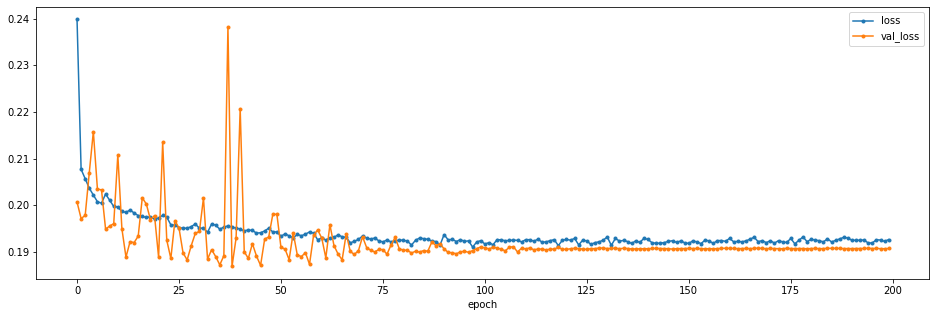

In [8]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss']);

# Compute PSNR to GT

In [9]:
groundtruth_data = np.load('data/BSD68_reproducibility_data/test/bsd68_groundtruth.npy', allow_pickle=True)

In [10]:
test_data = np.load('data/BSD68_reproducibility_data/test/bsd68_gaussian25.npy', allow_pickle=True)
# Note that we do not round or clip the noisy data to [0,255]
# If you want to enable clipping and rounding to emulate an 8 bit image format,
# uncomment the following line.
# test_data = np.round(np.clip(test_data, 0, 255.))

In [11]:
def PSNR(gt, img):
    mse = np.mean(np.square(gt - img))
    return 20 * np.log10(255) - 10 * np.log10(mse)

In [12]:
# Weights corresponding to the smallest validation loss
# Smallest validation loss does not necessarily correspond to best performance, 
# because the loss is computed to noisy target pixels.
model.load_weights('weights_best.h5')

In [13]:
pred = []
psnrs = []
for gt, img in zip(groundtruth_data, test_data):
    p_ = model.predict(img.astype(np.float32), 'YX');
    pred.append(p_)
    psnrs.append(PSNR(gt, p_))

psnrs = np.array(psnrs)

In [14]:
print("PSNR:", np.round(np.mean(psnrs), 2))

PSNR: 27.28


In [15]:
# The weights of the converged network. 
model.load_weights('weights_last.h5')

In [16]:
pred = []
psnrs = []
for gt, img in zip(groundtruth_data, test_data):
    p_ = model.predict(img.astype(np.float32), 'YX')
    pred.append(p_)
    psnrs.append(PSNR(gt, p_))

psnrs = np.array(psnrs)

In [17]:
print("PSNR:", np.round(np.mean(psnrs), 2))

PSNR: 27.71
